In [10]:
from urllib.request import urlretrieve
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(medical_charges_url, 'medical.csv')

medical_df = pd.read_csv('medical.csv')

medical_df.info()

print(medical_df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max     

In [11]:

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age'
                   )
fig.update_layout(bargap=0.1)
fig.show()

fig2 = px.histogram(medical_df,
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['red'],
                    title='Distribution of Body mass index')

fig2.update_layout(bargap=0.1)
fig2.show()

fig3 = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'grey'],
                    title='Annual Medical Charges(smokers)')

fig3.update_layout(bargap=0.1)
fig3.show()

fig4 = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color='sex',
                    color_discrete_sequence=['green', 'grey'],
                    title='Annual Medical Charges(smokers)')

fig4.update_layout(bargap=0.1)
fig4.show()

fig5 = px.histogram(medical_df,
                    x='charges',
                    marginal='box',
                    color='region',
                    color_discrete_sequence=['green', 'grey'],
                    title='Annual Medical Charges(region)')

fig5.update_layout(bargap=0.1)
fig5.show()

In [12]:
medical_df.smoker.value_counts()
px.histogram(medical_df, x='smoker', color ='sex', title='Smoker')

In [13]:
fig6 = px.scatter(medical_df,
                  x='age',
                  y='charges',
                  color='smoker',
                  opacity=0.8,
                  hover_data=['sex'],
                  title='Age vs.Charges')
fig6.update_traces(marker_size=5)
fig6.show()

In [14]:
fig7 = px.scatter(medical_df,
                  x='bmi',
                  y='charges',
                  color='smoker',
                  opacity=0.8,
                  hover_data=['sex'],
                  title='BMI vs.Charges')
fig7.update_traces(marker_size=5)
fig7.show()

In [16]:
fig8 = px.violin(medical_df,
                  x='children',
                  y='charges',
                  title='Number of Children vs.Charges')
fig8.update_traces(marker_size=5)
fig8.show()

In [ ]:
medical_df.smoker.value_counts()

px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

0.2990081933306476
0.19834096883362878
0.06799822684790469
0.7872514304984782


Text(0.5, 1.0, 'Correlation Matrix')

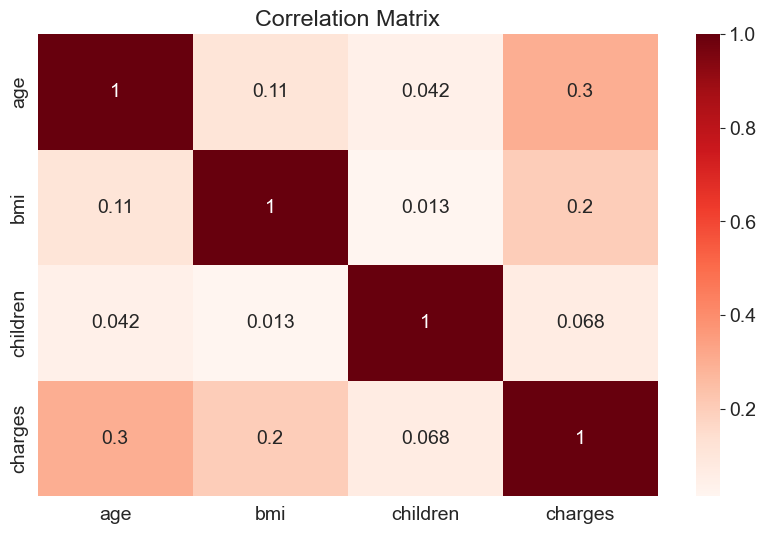

In [28]:
print(medical_df.charges.corr(medical_df.age))
print(medical_df.charges.corr(medical_df.bmi))
print(medical_df.charges.corr(medical_df.children))

smoker_values = {'no': 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
print(medical_df.charges.corr(smoker_numeric))

numeric_df = medical_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

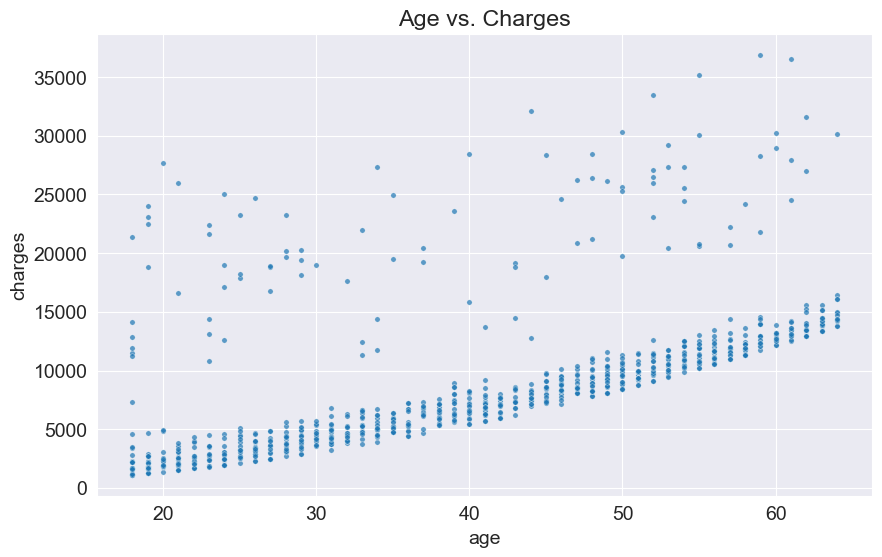

In [30]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x= 'age', y='charges', alpha=0.7, s=15)

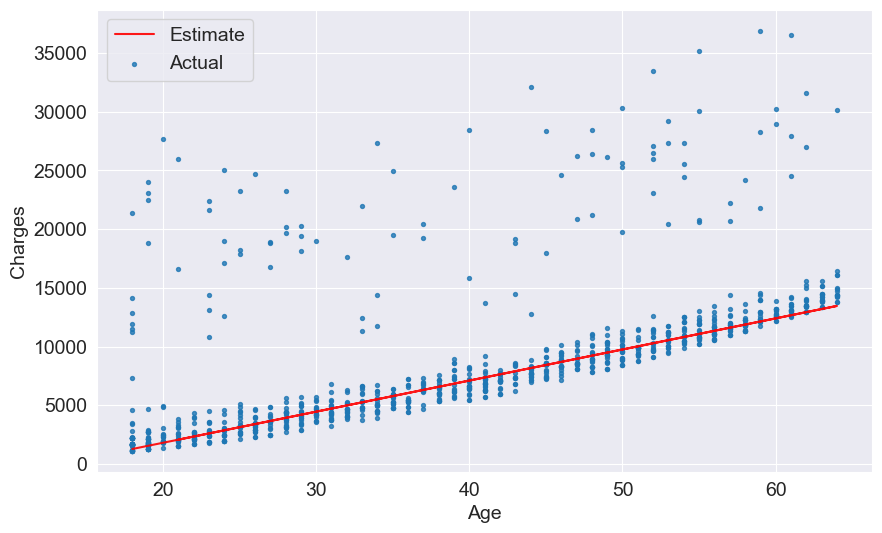

In [45]:
def estimate_charges(age, w,b):
    return w * age + b

def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

try_parameters(265, -3500)

